In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

titanic_data=pd.read_csv(r"C:\\Users\\manas\\Downloads\\titanic_dataset.csv")
print(titanic_data)

titanic_data.shape
titanic_data.info()


     PassengerId  Survived  Pclass   
0              1         0       3  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp   
0                              Braund, Mr. Owen Harris    male  22.0      1  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [31]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [33]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [34]:
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [35]:
print(titanic_data['Embarked'].mode()[0])

S


In [36]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [37]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [38]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [40]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

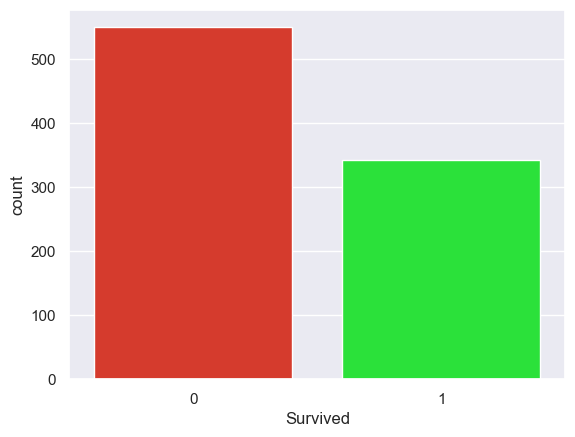

In [41]:
sns.countplot(x='Survived', data=titanic_data,palette=['#f12411','#0dff21'])

In [42]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

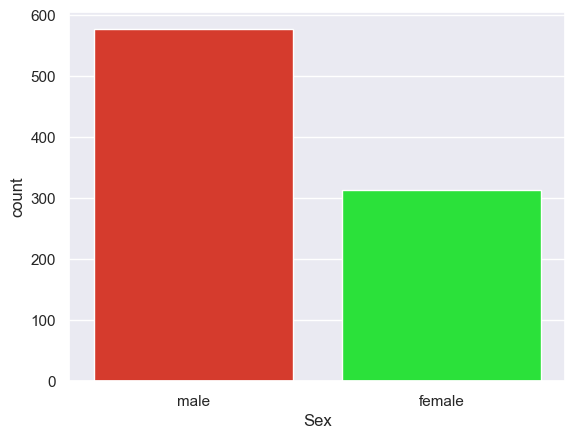

In [43]:
sns.countplot(x='Sex', data=titanic_data,palette=['#f12411','#0dff21'])

<Axes: xlabel='Sex', ylabel='count'>

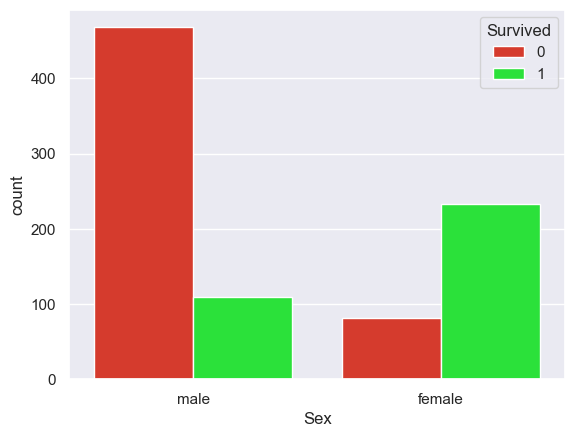

In [44]:
sns.countplot(x='Sex',hue='Survived',data=titanic_data,palette=['#f12411','#0dff21'])

<Axes: xlabel='Pclass', ylabel='count'>

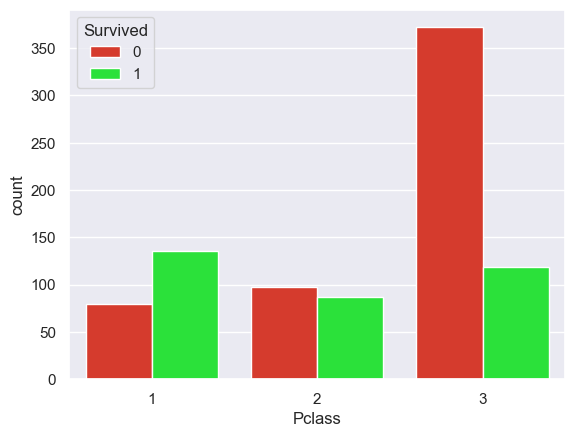

In [45]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_data,palette=['#f12411','#0dff21'])

In [46]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [47]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [48]:
titanic_data.replace({'Sex':{'male':0,'female':1},'Emarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [49]:
X=titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived', 'Embarked'],axis=1)
Y=titanic_data['Survived']

In [50]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare
0         3    0  22.000000      1      0   7.2500
1         1    1  38.000000      1      0  71.2833
2         3    1  26.000000      0      0   7.9250
3         1    1  35.000000      1      0  53.1000
4         3    0  35.000000      0      0   8.0500
..      ...  ...        ...    ...    ...      ...
886       2    0  27.000000      0      0  13.0000
887       1    1  19.000000      0      0  30.0000
888       3    1  29.699118      1      2  23.4500
889       1    0  26.000000      0      0  30.0000
890       3    0  32.000000      0      0   7.7500

[891 rows x 6 columns]


In [51]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [53]:
print(X.shape,X_train.shape,X_test.shape)

(891, 6) (712, 6) (179, 6)


In [54]:
model=LogisticRegression()

In [55]:
model.fit(X_train, Y_train)

LogisticRegression()

In [56]:
X_train_prediction=model.predict(X_train)               
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data: ',training_data_accuracy)

Accuracy score of training data:  0.8146067415730337


In [57]:
X_test_prediction=model.predict(X_test)              
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of test data: ',test_data_accuracy)

Accuracy score of test data:  0.776536312849162
